# The Sparks Foundation - #GRIPAPR21
# Author: Shreya Pimprikar
# Task-2: Prediction using Unsupervised ML
# Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# --------------------------------------------------------------------------------------------------------

# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing and understanding dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [34]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#info() method gives information like no of rows and columns in the dataset along with their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#describe() method is used to view the statistical summary of all the numerical cols in the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#value_counts() is used to give count of unique values in dataset
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
#Check if there are any null values in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# LabelEncoder() gives a numerical label to each entry in categorical column
l_encoder = LabelEncoder()
Species = l_encoder.fit_transform(df['Species'])
Species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualize  the dataset 

Text(0.5, 1.0, 'Sepal Length vs Sepal Width ')

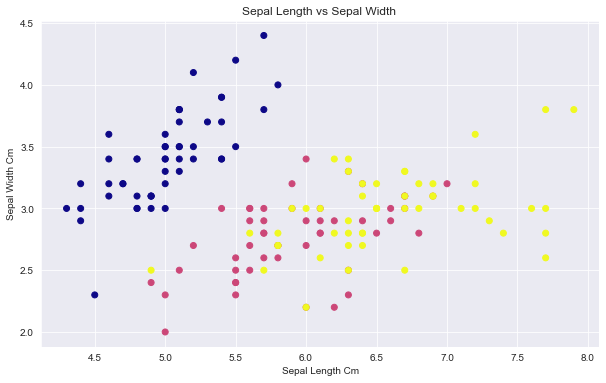

In [8]:
#plot the data and look for clusters based on 'Species' column
#This is an unsupervised problem so here,actually we wont have such output variable. In the given dataset,this variable 
#was present so it can be used to compare after we actually find the clusters.
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c = Species,cmap = 'plasma')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.title('Sepal Length vs Sepal Width ')

Text(0.5, 1.0, 'Petal Length vs Petal Width')

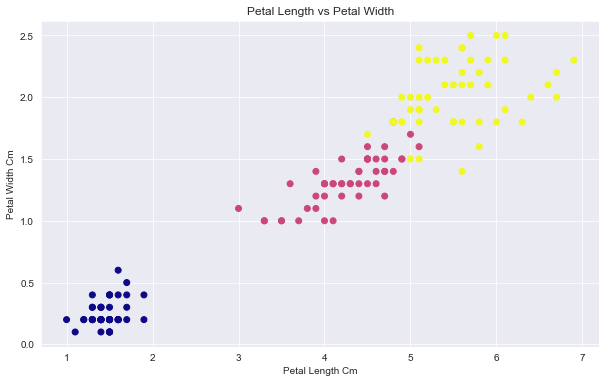

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'], c = Species,cmap = 'plasma')
plt.xlabel('Petal Length Cm')
plt.ylabel('Petal Width Cm')
plt.title('Petal Length vs Petal Width')

In [9]:
#As this is an unsupervised problem, we need to drop the output variable from dataset
df.drop(columns=['Id','Species'],axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Importing KMeans clustering model

In [12]:
from sklearn.cluster import KMeans

# First we will fit the data using some random k value

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [14]:
#View the cluster centers
kmeans.cluster_centers_

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [15]:
#Predicted labels for given dataset
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [89]:
#Inertia is the sum of squared distances of samples to their closest cluster center.
#We need to minimize this value
kmeans.inertia_

152.36870647733915

# Using 'elbow method' to find optimum k value(optimal clusters)

In [16]:
#use elbow method
#For each k value from 1 to 9, find inertia value
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

# Visualizing the result of elbow method

Text(0.5, 1.0, 'WCSS vs k value')

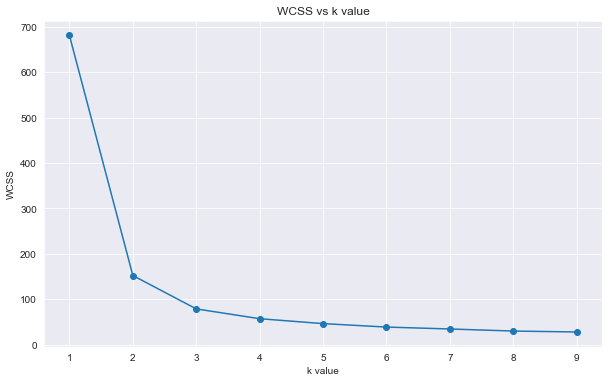

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss,'o-')
plt.xlabel('k value')
plt.ylabel('WCSS')
plt.title('WCSS vs k value')

### Observation:To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

# Create the model with 3 clusters

In [26]:
k_new = KMeans(n_clusters=3)
k_new.fit(df)

KMeans(n_clusters=3)

In [27]:
new_centroids = k_new.cluster_centers_
print(new_centroids)

[[5.00600000e+00 3.41800000e+00 1.46400000e+00 2.44000000e-01
  1.00000000e+00]
 [6.85000000e+00 3.07368421e+00 5.74210526e+00 2.07105263e+00
  8.88178420e-16]
 [5.90161290e+00 2.74838710e+00 4.39354839e+00 1.43387097e+00
  2.00000000e+00]]


In [28]:
#Labels for dataset after clustering
k_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [29]:
#New Inertia value
k_new.inertia_

78.94084142614601

In [30]:
#old value for inertia
kmeans.inertia_

152.36870647733915

### Observation: We can clearly see that our inertia has decreased for k=3

# Including the predicted clusters in dataset

In [31]:
df['Predicted_cluster'] = k_new.labels_

In [32]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Visualizing the data based on predicted cluster(output variable)

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

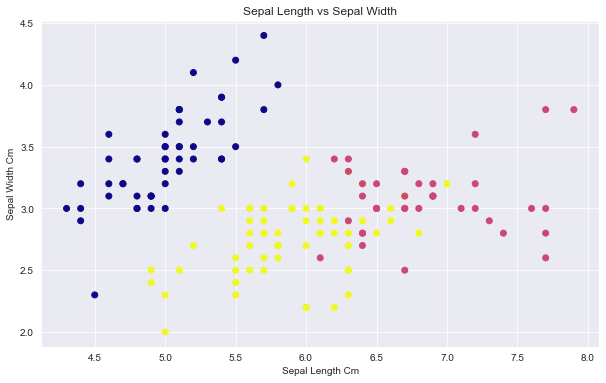

In [34]:
predicted_cluster = df['Predicted_cluster']
plt.figure(figsize=(10,6))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=predicted_cluster,cmap='plasma')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.title('Sepal Length vs Sepal Width')

# Conclusion: Predicted 3 clusters in given dataset